In [22]:
#!pip3 install geopandas
!pip3 install qeds


     |████████████████████████████████| 179 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 24.7 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 10.7 MB/s eta 0:00:01
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27813 sha256=ab3a0b4581d18e79a51b11ddb95442d5487dc897b1c23eaf119541573e481c5b
  Stored in directory: /Users/jsortega/Library/Caches/pip/wheels/38/56/3b/fba4c3ff6121d0bbeddfabc62ce65fb8478f24b637b5224f77
Successfully built qeds


In [130]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
from tqdm import tqdm
from shapely.geometry import Point
import qeds
import seaborn as sns
qeds.themes.mpl_style()
%matplotlib inline

In [70]:
qeds.themes.mpl_style()
pd.set_option("display.max_columns", 57)
pd.set_option("display.max_rows", 100)

# Limpieza de datos

In [54]:
df=pd.read_csv("./Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'ISO-8859-1')

In [55]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [52]:
df.shape

(1068, 57)

In [76]:
#df[(df['ESTADO']=='YUCATAN') & (df['SEMAFORO']=='Rojo') ].head()

In [75]:
#df[df['ESTADO']=='YUCATAN'].sort_values(by=['MUNICIPIO']).head(85)

In [47]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [94]:
df['CALIDAD_ALC'].unique()


array(['Alta', 'Media', 'Baja', 'Indeseable como FAAP', nan], dtype=object)

In [96]:
df[df['CALIDAD_ALC'].isna()]

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
406,DLNAY1855,POZO PANTANAL,LERMA SANTIAGO PACIFICO,NAYARIT,XALISCO,VALLE DE SANTA MARIA DEL ORO,POZO,-104.852820,21.42659,2020,NaN,NaN,302.0,Buena para riego,NaN,335.2,Excelente para riego,Potable - Dulce,<0.2,Baja,77.1888,Potable - Moderadamente suave,<1.1,Potable - Excelente,11.004114,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0422,Potable - Excelente,0.0922,Potable - Excelente,Rojo,"NO3,",ND,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
407,DLNAY1895,"MANANTIAL ""EL TESORERO""",PACIFICO NORTE,NAYARIT,SANTIAGO IXCUINTLA,VALLE SANTIAGO-SAN BLAS,POZO,-105.080640,21.84760,2020,NaN,NaN,50.4,Excelente para riego,NaN,<25,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Suave,31,Buena calidad,0.124414,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,0.0152,Potable - Excelente,0.2206,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
722,OCGCE3326,HOTEL JARAGUA S. A. DE C.V. (POZO 1),GOLFO CENTRO,VERACRUZ DE IGNACIO DE LA LLAVE,BOCA DEL RIO,COSTERA DE VERACRUZ,POZO,-96.105010,19.15072,2020,NaN,NaN,627.0,Buena para riego,NaN,498,Excelente para riego,Potable - Dulce,<0.2,Baja,246,Potable - Dura,<1.1,Potable - Excelente,5.681,Potable - Buena calidad,<0.01,Potable - Excelente,<0.003,Potable - Excelente,0.01227,Potable - Excelente,0.00058,Potable - Excelente,<0.005,Potable - Excelente,0.02474,Potable - Excelente,0.14133,Potable - Excelente,Verde,NaN,ND,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
861,OCNOR4205,CAMPO J. F. KENNEDY,NOROESTE,SONORA,PUERTO PEÑASCO,SONOYTA-PUERTO PEÑASCO,POZO,-113.313056,31.59940,2020,NaN,NaN,1281.0,Permisible para riego,NaN,1210,Cultivos con manejo especial,Ligeramente salobres,4.5144,Alta,118.2771,Potable - Moderadamente suave,<1.1,Potable - Excelente,5.555324,Potable - Buena calidad,0.0108,Apta como FAAP,<0.003,Potable - Excelente,0.0117,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,",ND,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [172]:
df_numericos=df[['LATITUD', 'LONGITUD', 'ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L', 'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L' , 'SEMAFORO']]
df_numericos

,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,22.20887,-102.02210,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891,Verde
1,21.99958,-102.20075,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
2,22.36685,-102.28801,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
3,22.18435,-102.29449,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025,Verde
4,23.45138,-110.24480,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025,Rojo
1064,24.78280,-99.70099,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578,Rojo
1065,25.55197,-99.82249,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129,Rojo
1066,24.80118,-100.32683,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786,Verde


In [173]:
df_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LATITUD              1068 non-null   float64
 1   LONGITUD             1068 non-null   float64
 2   ALC_mg/L             1064 non-null   float64
 3   CONDUCT_mS/cm        1062 non-null   float64
 4   SDT_M_mg/L           1066 non-null   object 
 5   FLUORUROS_mg/L       1068 non-null   object 
 6   DUR_mg/L             1067 non-null   object 
 7   COLI_FEC_NMP/100_mL  1068 non-null   object 
 8   N_NO3_mg/L           1067 non-null   object 
 9   AS_TOT_mg/L          1068 non-null   object 
 10  CD_TOT_mg/L          1068 non-null   object 
 11  CR_TOT_mg/L          1068 non-null   object 
 12  HG_TOT_mg/L          1068 non-null   object 
 13  PB_TOT_mg/L          1068 non-null   object 
 14  MN_TOT_mg/L          1068 non-null   object 
 15  FE_TOT_mg/L          1068 non-null   o

In [174]:
df_numericos.replace(to_replace=r'[<]\w+', value=0, regex=True, inplace=True)
df_numericos

/Users/jsortega/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,LATITUD,LONGITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,22.20887,-102.02210,229.990,940.0,603.6,0.9766,213.732,0,4.184656,0.0161,0,0,0,0,0,0.0891,Verde
1,21.99958,-102.20075,231.990,608.0,445.4,0.9298,185.0514,0,5.75011,0.0134,0,0,0,0,0,0,Verde
2,22.36685,-102.28801,204.920,532.0,342,1.8045,120.719,0,1.449803,0.037,0,0,0,0,0,0,Rojo
3,22.18435,-102.29449,327.000,686.0,478.6,1.1229,199.879,0,1.258597,0.0154,0,0.005,0,0,0,0,Verde
4,23.45138,-110.24480,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,0,0,0,0,0,0,0,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,24.76036,-99.54191,231.045,2350.0,1545.8,0,752.096,0,14.615488,0,0,0,0,0,0,0,Rojo
1064,24.78280,-99.70099,256.000,529.0,297,0,273,0,77.392,0,0,0,0,0,0.00709,0.07578,Rojo
1065,25.55197,-99.82249,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,0,0,0,0,0,0.0242,0.2129,Rojo
1066,24.80118,-100.32683,193.140,873.0,690.6667,0.7108,406.368,0,0,0,0,0,0,0,0.012,0.1786,Verde


In [136]:
df_numericos=df_numericos.astype('float')
df_numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [137]:
corr=df_numericos.corr()
corr

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
ALC_mg/L,1.000000,0.232003,0.079350,0.068982,0.242484,-0.016441,-0.000442,0.072592,0.030589,-0.014136,0.076929,0.023182,0.130074,0.043638
CONDUCT_mS/cm,0.232003,1.000000,0.286562,-0.023772,0.692690,0.017829,0.219482,-0.008690,0.027178,0.004159,0.048255,0.026432,0.096223,0.083540
SDT_M_mg/L,0.079350,0.286562,1.000000,-0.012557,0.346973,-0.001110,0.101710,-0.013096,0.010109,0.000194,0.037751,0.030445,0.019085,0.020271
FLUORUROS_mg/L,0.068982,-0.023772,-0.012557,1.000000,-0.152799,0.002728,-0.018393,0.457398,-0.019101,-0.004505,-0.035890,-0.043398,-0.049016,-0.009864
DUR_mg/L,0.242484,0.692690,0.346973,-0.152799,1.000000,0.031862,0.301449,-0.121827,0.023733,0.006983,0.066213,-0.011427,0.084150,0.060191
COLI_FEC_NMP/100_mL,-0.016441,0.017829,-0.001110,0.002728,0.031862,1.000000,-0.000963,0.033501,0.001762,-0.009335,-0.013002,0.017468,-0.005169,0.003213
N_NO3_mg/L,-0.000442,0.219482,0.101710,-0.018393,0.301449,-0.000963,1.000000,-0.001429,-0.010352,-0.015327,-0.001348,-0.019912,-0.037027,0.013107
AS_TOT_mg/L,0.072592,-0.008690,-0.013096,0.457398,-0.121827,0.033501,-0.001429,1.000000,-0.011335,-0.012069,-0.025514,-0.029946,0.018330,0.012053
CD_TOT_mg/L,0.030589,0.027178,0.010109,-0.019101,0.023733,0.001762,-0.010352,-0.011335,1.000000,-0.002126,-0.006840,-0.003995,-0.003267,-0.000971
CR_TOT_mg/L,-0.014136,0.004159,0.000194,-0.004505,0.006983,-0.009335,-0.015327,-0.012069,-0.002126,1.000000,0.011547,0.001978,-0.005121,0.000620


<AxesSubplot:>

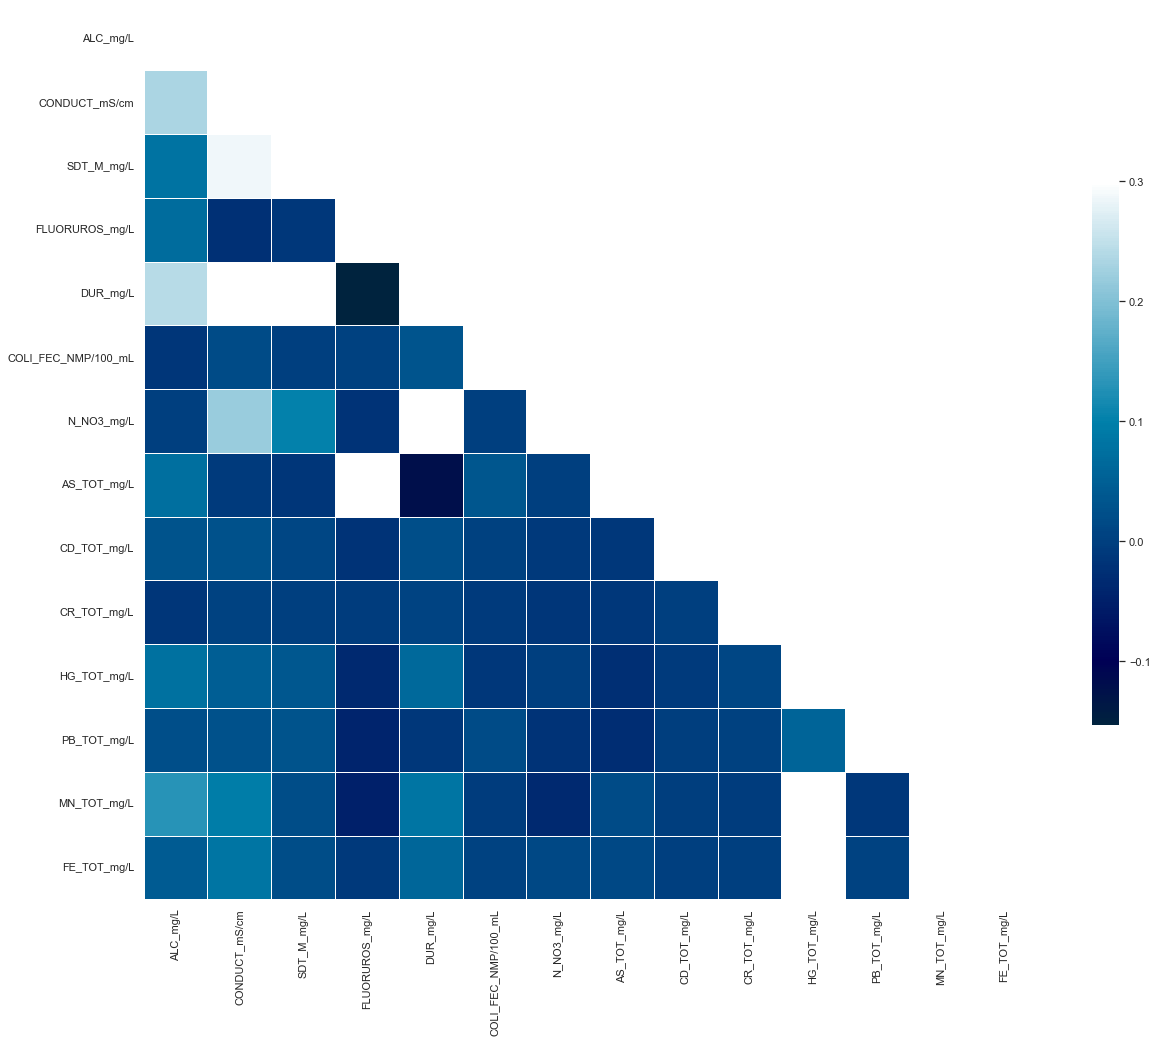

In [171]:
sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  cmap='ocean',  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Visualización

In [24]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
gdf=gpd.read_file("Estaciones_medicion_subterraneas.kml")

In [25]:
gdf.head()

,Name,Description,geometry
0,,,POINT Z (-102.02210 22.20887 0.00000)
1,,,POINT Z (-102.20075 21.99958 0.00000)
2,,,POINT Z (-102.28801 22.36685 0.00000)
3,,,POINT Z (-102.29449 22.18435 0.00000)
4,,,POINT Z (-110.24480 23.45138 0.00000)


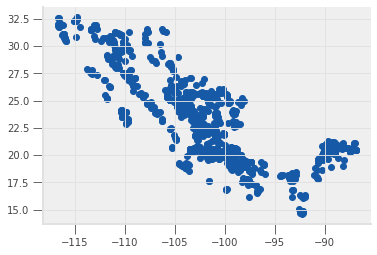

In [33]:
gdf.plot()
plt.show()

In [27]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [28]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

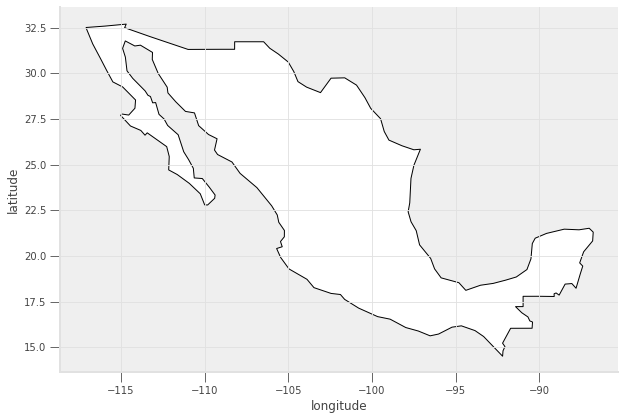

In [29]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

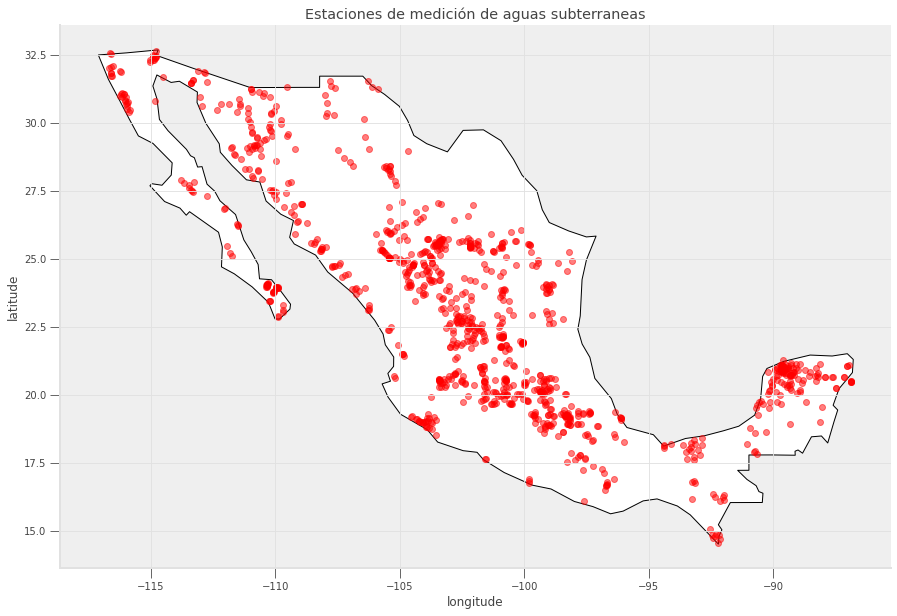

In [34]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(20,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Estaciones de medición de aguas subterraneas')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()